In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

F:\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


images/停机坪.jpg


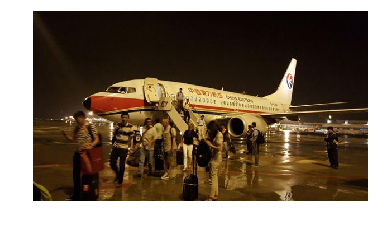

1.停机坪 (score = 0.90716)
2.机舱 (score = 0.02219)
3.游乐场 (score = 0.01267)
0.航站楼 (score = 0.01244)
5.舞台 (score = 0.00907)
6.艺术室 (score = 0.00906)
7.流水线 (score = 0.00801)
4.冰场 (score = 0.00780)
9.橄榄球场 (score = 0.00721)
8.棒球场 (score = 0.00440)

images/冰场.jpg


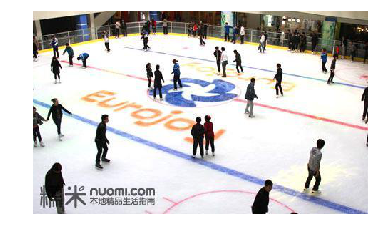

4.冰场 (score = 0.79454)
0.航站楼 (score = 0.03924)
3.游乐场 (score = 0.03162)
8.棒球场 (score = 0.02470)
1.停机坪 (score = 0.02466)
6.艺术室 (score = 0.02347)
7.流水线 (score = 0.02222)
5.舞台 (score = 0.01585)
9.橄榄球场 (score = 0.01524)
2.机舱 (score = 0.00845)

images/机舱.jpg


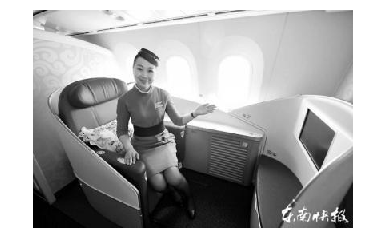

2.机舱 (score = 0.54007)
6.艺术室 (score = 0.13156)
7.流水线 (score = 0.06315)
3.游乐场 (score = 0.05740)
0.航站楼 (score = 0.05337)
5.舞台 (score = 0.05315)
1.停机坪 (score = 0.04204)
4.冰场 (score = 0.02701)
9.橄榄球场 (score = 0.01916)
8.棒球场 (score = 0.01309)

images/棒球场.jpg


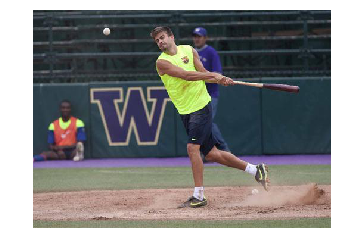

8.棒球场 (score = 0.61276)
9.橄榄球场 (score = 0.16338)
4.冰场 (score = 0.07426)
5.舞台 (score = 0.03021)
7.流水线 (score = 0.02593)
3.游乐场 (score = 0.02436)
0.航站楼 (score = 0.02114)
6.艺术室 (score = 0.01947)
1.停机坪 (score = 0.01650)
2.机舱 (score = 0.01199)

images/橄榄球场.jpg


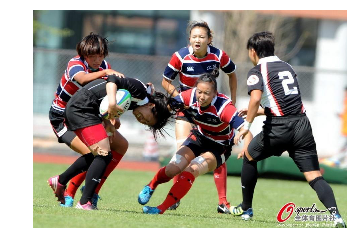

9.橄榄球场 (score = 0.90711)
8.棒球场 (score = 0.03101)
4.冰场 (score = 0.01141)
1.停机坪 (score = 0.00894)
3.游乐场 (score = 0.00886)
2.机舱 (score = 0.00764)
6.艺术室 (score = 0.00678)
0.航站楼 (score = 0.00662)
7.流水线 (score = 0.00636)
5.舞台 (score = 0.00528)

images/流水线.jpg


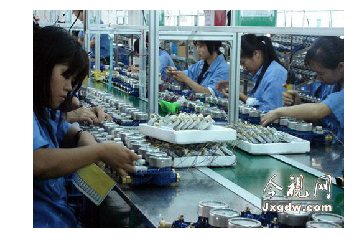

7.流水线 (score = 0.68870)
6.艺术室 (score = 0.16196)
0.航站楼 (score = 0.05539)
3.游乐场 (score = 0.02803)
5.舞台 (score = 0.01549)
2.机舱 (score = 0.01420)
8.棒球场 (score = 0.01123)
4.冰场 (score = 0.01007)
1.停机坪 (score = 0.01004)
9.橄榄球场 (score = 0.00488)

images/游乐场.jpg


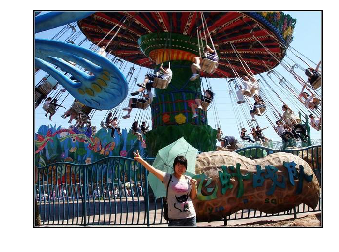

3.游乐场 (score = 0.77071)
4.冰场 (score = 0.03562)
6.艺术室 (score = 0.03176)
0.航站楼 (score = 0.02829)
7.流水线 (score = 0.02712)
5.舞台 (score = 0.02656)
1.停机坪 (score = 0.02265)
9.橄榄球场 (score = 0.02042)
8.棒球场 (score = 0.01990)
2.机舱 (score = 0.01697)

images/舞台.jpg


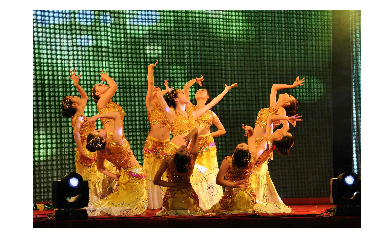

6.艺术室 (score = 0.19690)
5.舞台 (score = 0.19441)
3.游乐场 (score = 0.17922)
7.流水线 (score = 0.11622)
9.橄榄球场 (score = 0.08597)
8.棒球场 (score = 0.05330)
4.冰场 (score = 0.05121)
0.航站楼 (score = 0.05102)
2.机舱 (score = 0.04437)
1.停机坪 (score = 0.02740)

images/航站楼.jpg


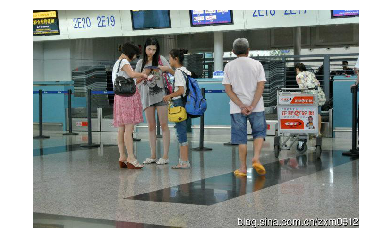

0.航站楼 (score = 0.80345)
7.流水线 (score = 0.05581)
4.冰场 (score = 0.03931)
5.舞台 (score = 0.03748)
2.机舱 (score = 0.02214)
6.艺术室 (score = 0.01380)
8.棒球场 (score = 0.01164)
3.游乐场 (score = 0.01110)
1.停机坪 (score = 0.00322)
9.橄榄球场 (score = 0.00204)

images/艺术室.jpg


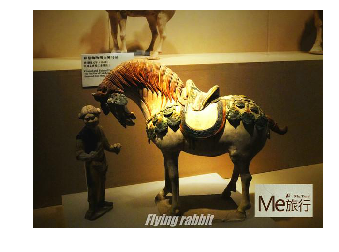

6.艺术室 (score = 0.39194)
3.游乐场 (score = 0.27688)
5.舞台 (score = 0.08840)
0.航站楼 (score = 0.04676)
7.流水线 (score = 0.04085)
4.冰场 (score = 0.03515)
8.棒球场 (score = 0.03296)
1.停机坪 (score = 0.03078)
9.橄榄球场 (score = 0.02891)
2.机舱 (score = 0.02736)



In [2]:
lines = tf.gfile.GFile('output_labels.txt').readlines()
uid_to_human = {}

# 一行一行读取数据
for uid,line in enumerate(lines) :
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line

# 分类编号变成描述
def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


# 创建一个图来存放训练好的模型
with tf.gfile.GFile('output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


with tf.Session() as sess:
    # final_result为输出tensor的名字
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    # 遍历目录
    for root,dirs,files in os.walk('images/'):
        for file in files:
            # 载入图片
            image_data = tf.gfile.GFile(os.path.join(root,file), 'rb').read()
            # 把图像数据传入模型获得模型输出结果
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})
            # 把结果转为1维数据
            predictions = np.squeeze(predictions)
            # 打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            # 显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # 排序
            top_k = predictions.argsort()[::-1]
            for node_id in top_k:     
                # 获取分类名称
                human_string = id_to_string(node_id)
                # 获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()